## Check Cellpose diamater of disks and rods 

In this notebook we trivially (for 10 epochs) train two Cellpose Networks on just the disks images or just the rods with empty masks. 

We do this to force the diameter calculation to occur, so we can check the value Cellpose is using (empty masks may mess up the calculation).

Todo:  Cellpose experts let us know if there is a direct way in the Cellpose API to call the diameter calculation on a list of masks!

In [1]:
import os
from tnia.plotting.plt_helper import imshow_multi2d
from cellpose import models, io
from pathlib import Path

## Load inputs and ground truth

We load directories called 'input0' and 'ground truth0' which should exist under ```train_path```.  The reason we append '0' to the end of the name is because some of the code that generates image and label sets is meant to work on multiple channels (so the 0 is the channel number)

In [2]:
parent_path = r'D:\images\tnia-python-images\imagesc\2025_04_12_disk_like'

train_path = os.path.join(parent_path, 'patches')

image_patch_path = train_path + '/ground truth0'
label_patch_path = train_path + '/input0'

model_path = os.path.join(parent_path,'models')

if not os.path.exists(model_path):
    os.makedirs(model_path)

if not os.path.exists(image_patch_path):
    print('image_patch_path does not exist')

if not os.path.exists(label_patch_path):
    print('label_patch_path does not exist')

## Use a helper to collect the training data

The helper will also normalize the inputs.

In [3]:
import warnings
warnings.filterwarnings('ignore')

from tnia.deeplearning.dl_helper import collect_training_data
X, Y = collect_training_data(train_path, sub_sample=1, downsample=False, add_trivial_channel=False, relabel=True)

print('Number of input images', len(X))
print('Number of ground truth images ', len(Y))

print('Size of first input image', X[0].shape)
print('Size of first ground truth image ', Y[0].shape)

100%|██████████| 200/200 [00:06<00:00, 29.27it/s]

Number of input images 200
Number of ground truth images  200
Size of first input image (256, 256)
Size of first ground truth image  (256, 256)


## Inspect images

Take a look at first (well zeroth) and 100th image, first should be a disk image with masks, and 100th a rod image with empty mask. 

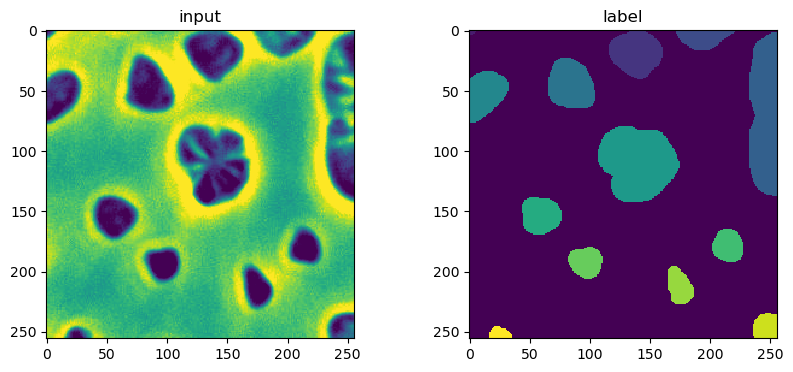

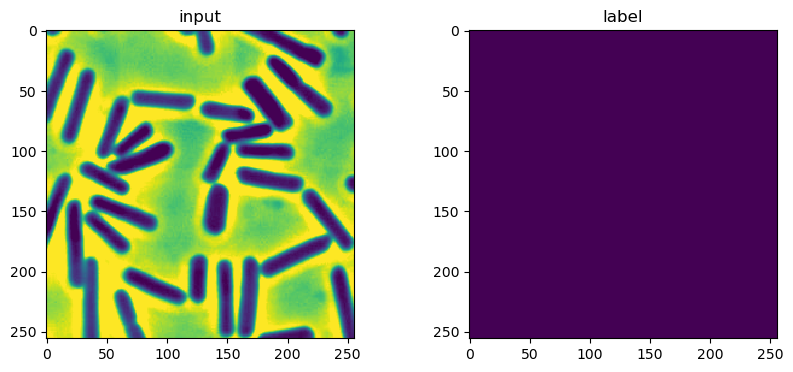

In [18]:
fig=imshow_multi2d([X[0], Y[0]], ['input', 'label'], 1,2)
fig=imshow_multi2d([X[100], Y[100]], ['input', 'label'], 1,2)

## Divide into disks and rod sets

First 100 images should be disks, and next 100 rods. 

In [19]:
X_disks = X[:100]
Y_disks = Y[:100]
X_disks_test = X_disks.copy()
Y_disks_test = Y_disks.copy()

X_rods = X[100:200]
Y_rods = Y[100:200]
X_rods_test = X_rods.copy()
Y_rods_test = Y_rods.copy()


## Create a cellpose model for disks and rods

In [20]:
import os

model_name_disks = 'diameter_test_disks'
model_name_rods = 'diameter_test_rods'

# start logger (to see training across epochs)
logger = io.logger_setup()

# DEFINE CELLPOSE MODEL (without size model)
model_disks = models.CellposeModel(gpu=True, model_type=None)
model_rods = models.CellposeModel(gpu=True, model_type=None)

creating new log file
2025-04-25 11:33:35,548 [INFO] WRITING LOG OUTPUT TO C:\Users\bnort\.cellpose\run.log
2025-04-25 11:33:35,549 [INFO] 
cellpose version: 	3.1.0 
platform:       	win32 
python version: 	3.11.11 
torch version:  	2.6.0
2025-04-25 11:33:35,552 [INFO] ** TORCH CUDA version installed and working. **
2025-04-25 11:33:35,554 [INFO] >>>> using GPU (CUDA)
2025-04-25 11:33:35,671 [INFO] >>>> no model weights loaded
2025-04-25 11:33:35,675 [INFO] ** TORCH CUDA version installed and working. **
2025-04-25 11:33:35,676 [INFO] >>>> using GPU (CUDA)
2025-04-25 11:33:35,788 [INFO] >>>> no model weights loaded


# Train the models 
(what we really want is to look at the calculated label diametersi)

In [ ]:
from cellpose import train

channel_to_segment = 0 
optional_channel = 0

train.train_seg(model_disks.net, X_disks, Y_disks, 
                              channels=[channel_to_segment,optional_channel], 
                              save_path=parent_path, 
                              n_epochs=10,
                              min_train_masks=0,
                              rescale = True,  
                              model_name=model_name_disks,
                              normalize=False)

train.train_seg(model_rods.net, X_rods, Y_rods, 
                              channels=[channel_to_segment,optional_channel], 
                              save_path=parent_path, 
                              n_epochs=10,
                              min_train_masks=0,
                              rescale = True,  
                              model_name=model_name_rods,
                              normalize=False)


2025-04-25 11:37:37,742 [INFO] computing flows for labels


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]

2025-04-25 11:37:45,205 [INFO] >>> computing diameters



100%|██████████| 100/100 [00:00<00:00, 3439.17it/s]

2025-04-25 11:37:45,237 [INFO] >>> using channels [0, 0]
2025-04-25 11:37:45,267 [INFO] >>> n_epochs=10, n_train=100, n_test=None
2025-04-25 11:37:45,268 [INFO] >>> AdamW, learning_rate=0.00500, weight_decay=0.00001
2025-04-25 11:37:45,270 [INFO] >>> saving model to D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_disks


2025-04-25 11:37:46,641 [INFO] 0, train_loss=0.1965, test_loss=0.0000, LR=0.000000, time 1.37s
2025-04-25 11:37:53,009 [INFO] 5, train_loss=0.1832, test_loss=0.0000, LR=0.002778, time 7.74s
2025-04-25 11:37:58,055 [INFO] saving network parameters to D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_disks
2025-04-25 11:37:58,190 [INFO] computing flows for labels


  0%|          | 0/100 [00:00<?, ?it/s]

2025-04-25 11:37:58,237 [WARNING] empty masks!
2025-04-25 11:37:58,240 [WARNING] empty masks!
2025-04-25 11:37:58,243 [WARNING] empty masks!
2025-04-25 11:37:58,245 [WARNING] empty masks!
2025-04-25 11:37:58,246 [WARNING] empty masks!
2025-04-25 11:37:58,248 [WARNING] empty masks!
2025-04-25 11:37:58,251 [WARNING] empty masks!
2025-04-25 11:37:58,253 [WARNING] empty masks!
2025-04-25 11:37:58,255 [WARNING] empty masks!
2025-04-25 11:37:58,258 [WARNING] empty masks!
2025-04-25 11:37:58,260 [WARNING] empty masks!
2025-04-25 11:37:58,263 [WARNING] empty masks!
2025-04-25 11:37:58,265 [WARNING] empty masks!
2025-04-25 11:37:58,268 [WARNING] empty masks!
2025-04-25 11:37:58,270 [WARNING] empty masks!
2025-04-25 11:37:58,272 [WARNING] empty masks!
2025-04-25 11:37:58,274 [WARNING] empty masks!
2025-04-25 11:37:58,276 [WARNING] empty masks!
2025-04-25 11:37:58,277 [WARNING] empty masks!
2025-04-25 11:37:58,279 [WARNING] empty masks!
2025-04-25 11:37:58,281 [WARNING] empty masks!
2025-04-25 11

 56%|█████▌    | 56/100 [00:00<00:00, 554.45it/s]

2025-04-25 11:37:58,339 [WARNING] empty masks!
2025-04-25 11:37:58,340 [WARNING] empty masks!
2025-04-25 11:37:58,342 [WARNING] empty masks!
2025-04-25 11:37:58,343 [WARNING] empty masks!
2025-04-25 11:37:58,345 [WARNING] empty masks!
2025-04-25 11:37:58,346 [WARNING] empty masks!
2025-04-25 11:37:58,348 [WARNING] empty masks!
2025-04-25 11:37:58,350 [WARNING] empty masks!
2025-04-25 11:37:58,351 [WARNING] empty masks!
2025-04-25 11:37:58,353 [WARNING] empty masks!
2025-04-25 11:37:58,354 [WARNING] empty masks!
2025-04-25 11:37:58,356 [WARNING] empty masks!
2025-04-25 11:37:58,359 [WARNING] empty masks!
2025-04-25 11:37:58,361 [WARNING] empty masks!
2025-04-25 11:37:58,362 [WARNING] empty masks!
2025-04-25 11:37:58,364 [WARNING] empty masks!
2025-04-25 11:37:58,365 [WARNING] empty masks!
2025-04-25 11:37:58,368 [WARNING] empty masks!
2025-04-25 11:37:58,369 [WARNING] empty masks!
2025-04-25 11:37:58,371 [WARNING] empty masks!
2025-04-25 11:37:58,373 [WARNING] empty masks!
2025-04-25 11

100%|██████████| 100/100 [00:00<00:00, 571.43it/s]

2025-04-25 11:37:58,413 [INFO] >>> computing diameters



100%|██████████| 100/100 [00:00<00:00, 1886.84it/s]

2025-04-25 11:37:58,468 [INFO] >>> using channels [0, 0]
2025-04-25 11:37:58,492 [INFO] >>> n_epochs=10, n_train=100, n_test=None
2025-04-25 11:37:58,493 [INFO] >>> AdamW, learning_rate=0.00500, weight_decay=0.00001
2025-04-25 11:37:58,496 [INFO] >>> saving model to D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_rods


2025-04-25 11:37:59,756 [INFO] 0, train_loss=0.0067, test_loss=0.0000, LR=0.000000, time 1.26s
2025-04-25 11:38:06,257 [INFO] 5, train_loss=0.0027, test_loss=0.0000, LR=0.002778, time 7.76s
2025-04-25 11:38:11,312 [INFO] saving network parameters to D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_rods


(WindowsPath('D:/images/tnia-python-images/imagesc/2025_04_12_disk_like/models/diameter_test_rods'),
 array([0.00670128, 0.00550132, 0.00380674, 0.00218487, 0.00123291,
        0.00092852, 0.00066713, 0.00045905, 0.00039317, 0.00028279]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## Check diameters

Reload the models (seems this is needed to update the diameter) and check the diameters. 

Note that ```diameter_labels``` of the rod images (that have empty masks) is only 5.0.  This is probably a constrained minimum and may cause incorrect training if there are empty masks. 

(My observation is that rescaling needs to be turned off if there are empty masks)

In [26]:
model_disks=models.CellposeModel(gpu=True, pretrained_model=os.path.join(parent_path, 'models', model_name_disks))
model_rods=models.CellposeModel(gpu=True, pretrained_model=os.path.join(parent_path, 'models', model_name_rods))

print('reloaded dam mean disks', model_disks.diam_mean)
print('reloaded diam labels disks', model_disks.diam_labels)
print('loaded dam mean rods', model_rods.diam_mean)
print('reloaded diam labels rods', model_rods.diam_labels)

2025-04-25 11:38:11,847 [INFO] ** TORCH CUDA version installed and working. **
2025-04-25 11:38:11,848 [INFO] >>>> using GPU (CUDA)
2025-04-25 11:38:11,936 [INFO] >>>> loading model D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_disks
2025-04-25 11:38:12,054 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-04-25 11:38:12,055 [INFO] >>>> model diam_labels =  30.105 (mean diameter of training ROIs)
2025-04-25 11:38:12,059 [INFO] ** TORCH CUDA version installed and working. **
2025-04-25 11:38:12,060 [INFO] >>>> using GPU (CUDA)
2025-04-25 11:38:12,153 [INFO] >>>> loading model D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\diameter_test_rods
2025-04-25 11:38:12,264 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-04-25 11:38:12,265 [INFO] >>>> model diam_labels =  5.000 (mean diameter of training ROIs)
reloaded dam mean disks 30.0
reloaded diam labels disks 30.1